In [97]:
# imports.py
from imports import *
from sklearn.datasets import make_blobs

# plotting magic
%matplotlib inline

# custom mods
import tidy
import model_h
import wrangle

In [2]:
df=tidy.explore_df()
df.info()

cached csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2807 entries, 2014-09-17 00:00:00+00:00 to 2022-05-24 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2807 non-null   float64
 1   high                2807 non-null   float64
 2   low                 2807 non-null   float64
 3   close               2807 non-null   float64
 4   volume              2807 non-null   int64  
 5   fwd_log_ret         2807 non-null   float64
 6   fwd_ret             2807 non-null   float64
 7   fwd_pct_chg         2807 non-null   float64
 8   fwd_close_positive  2807 non-null   bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 200.1 KB


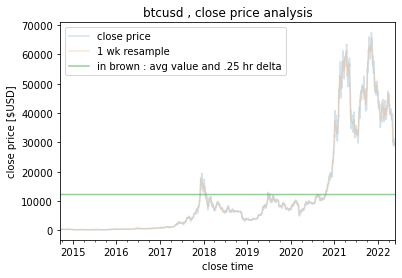

In [3]:
model_h.print_btcusd(df)

In [4]:
df.head()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive
date,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True


<AxesSubplot:xlabel='date'>

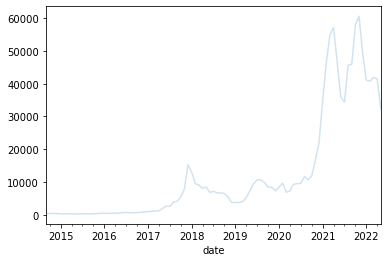

In [5]:
df.close.resample('m').mean().plot(alpha=.2, label='resample')

In [6]:
# model_h.d_stats_btcusd(df)

In [7]:
def split_i(df):
	train = df.loc[:'2022-3-22']
	validate =df.loc['2022-03-23':'2022-04-23'] 
	return train, validate

In [8]:
def split_ii(df):
	train = df.loc[:'2022-04-24']
	test = df.loc['2022-04-25':]
	return train, test

In [9]:
train_i, validate=split_i(df)
train_i.info(),validate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2744 entries, 2014-09-17 00:00:00+00:00 to 2022-03-22 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2744 non-null   float64
 1   high                2744 non-null   float64
 2   low                 2744 non-null   float64
 3   close               2744 non-null   float64
 4   volume              2744 non-null   int64  
 5   fwd_log_ret         2744 non-null   float64
 6   fwd_ret             2744 non-null   float64
 7   fwd_pct_chg         2744 non-null   float64
 8   fwd_close_positive  2744 non-null   bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 195.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2022-03-23 00:00:00+00:00 to 2022-04-23 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  ----

(None, None)

In [10]:
train_ii, test=split_ii(df)
train_ii.info(),test.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2777 entries, 2014-09-17 00:00:00+00:00 to 2022-04-24 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2777 non-null   float64
 1   high                2777 non-null   float64
 2   low                 2777 non-null   float64
 3   close               2777 non-null   float64
 4   volume              2777 non-null   int64  
 5   fwd_log_ret         2777 non-null   float64
 6   fwd_ret             2777 non-null   float64
 7   fwd_pct_chg         2777 non-null   float64
 8   fwd_close_positive  2777 non-null   bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 198.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2022-04-25 00:00:00+00:00 to 2022-05-24 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  ----

(None, None)

In [11]:
df.fwd_log_ret.sum()

4.17316149094532

In [12]:
df.close[-1]-df.close[0]

# this is ROI if you bought 1 btc in 2014-09-17 and sold in 2022-05-24

29198.251923

In [13]:
df.index[0].date()

datetime.date(2014, 9, 17)

In [14]:
def macd_df(df):
	'''
	macd encoder
	'''
	macd, signal, histo = talib.MACD(df.close,fastperiod=12, slowperiod=26, signalperiod=9)
	mac=pd.concat([df,macd,signal,histo],axis=1)
	mac=mac.rename(columns={0:'macd',1:'signal',2:'histo'})
	mac=mac.drop(mac[mac.index<'2014-10-20'].index)
	mac=mac.fillna(0)
	cools=mac.histo>0
	start=cools[0]
	not_list=[]

	for x in cools:
		if x:
			not_list.append(1)
		else:
			not_list.append(0)

	not_list=pd.Series(not_list, index=mac.index)
	bools=mac.macd>mac.signal
	yesterday=bools[0]
	list=[]

	for today in bools:
		if today==yesterday:
			list.append(0)
			continue
		else:
			list.append(1)
			yesterday=today

	list=pd.Series(list, index=mac.index)

	# crossover indicator
	macker=pd.concat([mac.close,list,not_list],axis=1)
	macker=macker.rename({0:'cross',1:'histy'},axis=1)

	return macker, mac

macker, mac=macd_df(df)

In [15]:
def macd_roi(df):
	buy=[]
	sell=[]
	for i in df.index:
		if df.loc[i].cross > 0:
			if df.loc[i].histy > 0:
				buy.append(df.loc[i].close)
				sell.append(0)
			else:
				buy.append(0)
				sell.append(df.loc[i].close)
		else:
			continue
	return buy,sell

In [16]:
buy,sell=macd_roi(macker)

In [17]:
profits=pd.DataFrame({'buy':buy,'sell':sell})

In [18]:
if profits.buy.loc[0] == 0:
	profits=profits.drop(0)
	profits.sell=profits.sell.shift(-1)
else:
	profits.sell=profits.sell.shift(-1)

In [19]:
(profits.sell-profits.buy).sum()

36491.43405399999

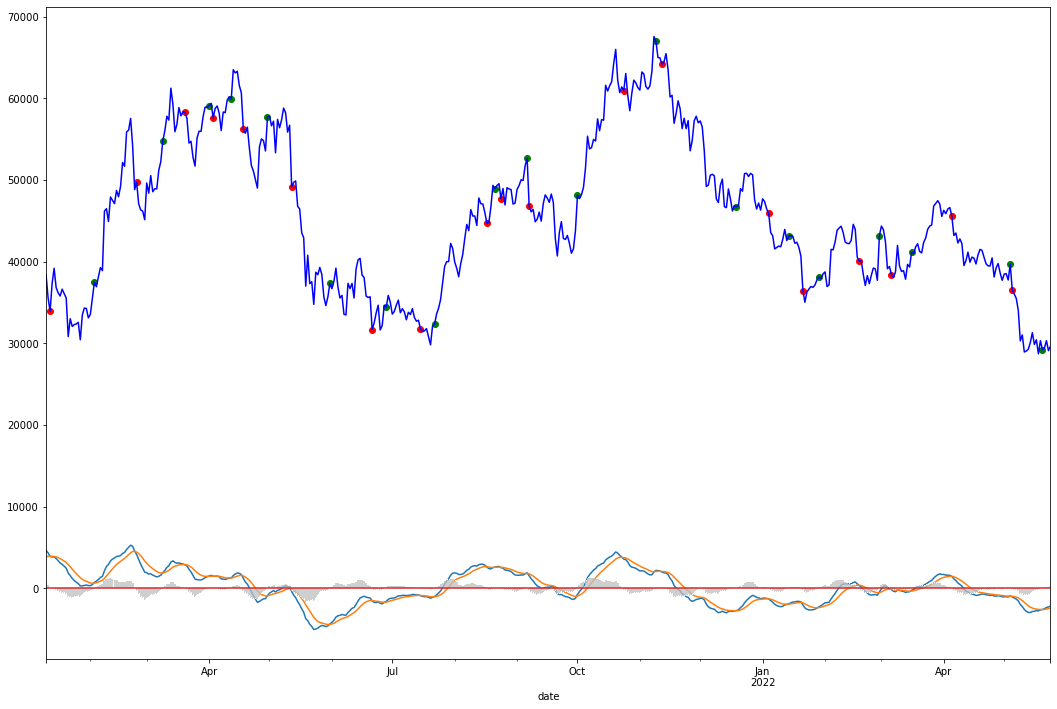

In [20]:
plt.figure(figsize=[18,12])
mac.macd.tail(500).plot()
mac.signal.tail(500).plot()
plt.stem(mac.index[-500:],mac['histo'].tail(500),linefmt='silver',markerfmt='w,')
_=macker[(macker.cross==1)&(macker.histy==1)].tail(500)
plt.scatter(y=_.close,x=_.index,c='green')
_=macker[(macker.cross==1)&(macker.histy==0)].tail(500)
plt.scatter(y=_.close,x=_.index,c='red')
macker.close.tail(500).plot(color='blue')
plt.show()


#wip


In [21]:
df = wrangle.wrangle_df()

cached csv


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2774 entries, 2014-10-20 to 2022-05-24
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          2774 non-null   float64
 1   high                          2774 non-null   float64
 2   low                           2774 non-null   float64
 3   close                         2774 non-null   float64
 4   volume                        2774 non-null   int64  
 5   fwd_log_ret                   2774 non-null   float64
 6   fwd_ret                       2774 non-null   float64
 7   fwd_pct_chg                   2774 non-null   float64
 8   fwd_close_positive            2774 non-null   int64  
 9   cross                         2774 non-null   float64
 10  histy                         2774 non-null   float64
 11  month_9                       2774 non-null   int64  
 12  month_10                      2774 non-null 

In [70]:
X=df[['open', 'high', 'low', 'close', 'volume',  'cross', 'histy', 'month_9', 'month_10', 'day_20', 'day_1', 'day_9', 'atr_above_threshold_0.01', 'atr_above_threshold_0.05', 'atr_above_threshold_0.1', 'atr_above_threshold_0.2', 'atr_above_threshold_0.3', 'avg-fees-per-transaction', 'cost-per-transaction-percent', 'cost-per-transaction', 'difficulty', 'hash-rate', 'miners-revenue', 'transaction-fees-to-miners']]

In [24]:
y=df[['fwd_log_ret', 'fwd_ret', 'fwd_pct_chg', 'fwd_close_positive']]

In [71]:
X_train, X_val=tidy.split_i(X)

In [85]:
y_train, y_val=tidy.split_i(y)

In [74]:
smaller=X_train.volume.copy()

X_train.volume=smaller.astype('float64')

In [80]:
for col in X_train.columns:
	if X_train[col].dtype == 'float64':
		xs=np.array(X_train[[col]]).reshape(-1, 1)
		X_train.loc[:,col]=RobustScaler().fit_transform(xs)
		print(col)


open
high
low
close
volume
cross
histy
avg-fees-per-transaction
cost-per-transaction-percent
cost-per-transaction
difficulty
hash-rate
miners-revenue
transaction-fees-to-miners


/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_22929/1090873265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,col]=RobustScaler().fit_transform(xs)
/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_22929/1090873265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,col]=RobustScaler().fit_transform(xs)
/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_22929/1090873265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [81]:
X_train.head()

,open,high,low,close,volume,cross,histy,month_9,month_10,day_20,day_1,day_9,atr_above_threshold_0.01,atr_above_threshold_0.05,atr_above_threshold_0.1,atr_above_threshold_0.2,atr_above_threshold_0.3,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners
2014-10-20,-0.594923,-0.590765,-0.603427,-0.596215,-0.211943,0.0,0.0,0,1,1,0,0,False,False,False,False,False,-0.319844,1.865922,-0.176852,-0.33258,-0.333372,-0.528352,-0.323265
2014-10-21,-0.595593,-0.590519,-0.603166,-0.595858,-0.212032,0.0,0.0,0,1,0,0,0,False,False,False,False,False,-0.319401,1.865922,-0.253825,-0.33258,-0.333372,-0.518958,-0.321070
2014-10-22,-0.595229,-0.590910,-0.603022,-0.596184,-0.212133,0.0,0.0,0,1,0,0,0,False,False,False,False,False,-0.319401,1.865922,-0.253825,-0.33258,-0.332771,-0.518958,-0.321070
2014-10-23,-0.595539,-0.591249,-0.605638,-0.598620,-0.211542,0.0,0.0,0,1,0,0,0,False,False,False,False,False,-0.319401,1.568939,-0.253825,-0.33258,-0.332771,-0.518958,-0.321070
2014-10-24,-0.597937,-0.593238,-0.605957,-0.598627,-0.211976,0.0,0.0,0,1,0,0,0,False,False,False,False,False,-0.321155,1.568939,-0.277610,-0.33258,-0.332771,-0.537035,-0.322373


In [154]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [89]:

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

In [91]:
y_train.head()

,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive
2014-10-20,0.009437,3.630005,0.009482,1
2014-10-21,-0.008620,-3.317016,-0.008583,0
2014-10-22,-0.066750,-24.740998,-0.064571,0
2014-10-23,-0.000201,-0.071991,-0.000201,0
2014-10-24,-0.031391,-11.074005,-0.030903,0


In [96]:

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train.fwd_close_positive, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train.fwd_close_positive, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train.fwd_close_positive, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_train.fwd_close_positive, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(y_train.fwd_close_positive, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train, labels))

Estimated number of clusters: 16
Estimated number of noise points: 2058
Homogeneity: 0.005
Completeness: 0.004
V-measure: 0.004
Adjusted Rand Index: -0.003
Adjusted Mutual Information: 0.001
Silhouette Coefficient: -0.275


In [155]:
np.argwhere(np.isnan(labels))

array([], shape=(0, 1), dtype=int64)

In [156]:
labels=pd.DataFrame(labels,columns=['clust'],dtype='int',index=X_train.index)

In [157]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2711 entries, 2014-10-20 to 2022-03-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   clust   2711 non-null   int64
dtypes: int64(1)
memory usage: 106.9 KB


In [164]:
type(labels.clust.iloc[0])

numpy.int64

In [165]:
type(X_train.open.iloc[0])

numpy.float64

In [171]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2711 entries, 2014-10-20 to 2022-03-22
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          2711 non-null   float64
 1   high                          2711 non-null   float64
 2   low                           2711 non-null   float64
 3   close                         2711 non-null   float64
 4   volume                        2711 non-null   float64
 5   cross                         2711 non-null   float64
 6   histy                         2711 non-null   float64
 7   month_9                       2711 non-null   int64  
 8   month_10                      2711 non-null   int64  
 9   day_20                        2711 non-null   int64  
 10  day_1                         2711 non-null   int64  
 11  day_9                         2711 non-null   int64  
 12  atr_above_threshold_0.01      2711 non-null 

In [168]:
X_train=pd.concat([X_train,labels],axis=1)

In [169]:
xt=X_train.loc['2018':'2021']

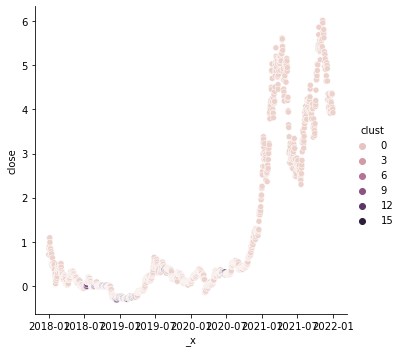

In [173]:
sns.relplot(x=X_train.loc['2018':'2021'].index, y=X_train.loc['2018':'2021'].close, hue=X_train.loc['2018':'2021'].clust)